## Loan Prediction Project

The following activities needs to be done.
1. Data Exploration
2. Plot Corelation matrix to check for independence and dependence
3. Impute data
4. Compare statistics between Strategy of dropping rows with missing data vs imputing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("../../train_u6lujuX_CVtuZ9i.csv")
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
df['Dependents'] = df['Dependents'].astype('category', ordered=True, categories=['0', '1', '2', '3+'])
df['Gender'] = df['Gender'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Education'] = df['Education'].astype('category', ordered=True,  categories=['Graduate', 'Not Graduate'])
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')
df['Loan_Status'] = df['Loan_Status'].astype('category')
print(df.dtypes)

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object


C:\Users\nagmani\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  if __name__ == '__main__':
C:\Users\nagmani\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


In [4]:
ordinal_cols = ['Dependents', 'Loan_Status']
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [5]:
df_ss = df.dropna()
print(df_ss.shape)
print(df_ss['Loan_Status'].value_counts())

(480, 13)
Y    332
N    148
Name: Loan_Status, dtype: int64


In [6]:
df_ss[ordinal_cols] = df_ss[ordinal_cols].apply(lambda x: x.cat.codes)

C:\Users\nagmani\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [7]:
df_ss.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [8]:
# Scaling of outliers
from sklearn.preprocessing import MinMaxScaler, RobustScaler


num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
trans_mm = MinMaxScaler(feature_range=(-1., 1.))
df_ss[num_cols]= trans_mm.fit_transform(df_ss[num_cols])
    
    
df_ss[num_cols].describe()

C:\Users\nagmani\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nagmani\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,480.000000,480.000000,480.000000,480.000000
mean,-0.871015,-0.906546,-0.540658,0.378604
std,0.140216,0.154724,0.272447,0.293750
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.932004,-1.000000,-0.692047,0.459459
50%,-0.908250,-0.935899,-0.597293,0.459459
75%,-0.858936,-0.866817,-0.455161,0.459459
max,1.000000,1.000000,1.000000,1.000000


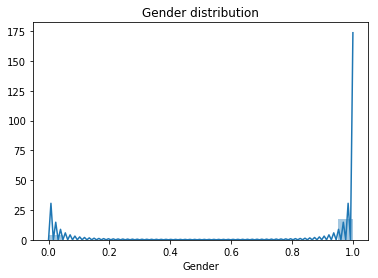

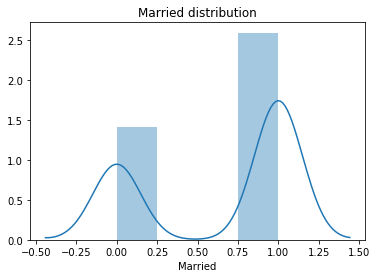

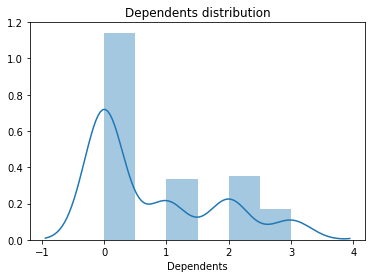

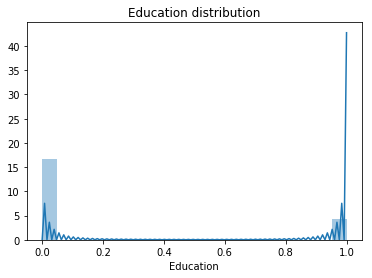

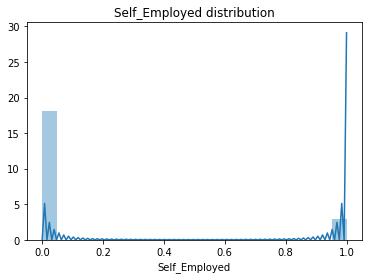

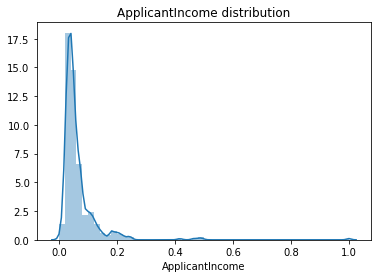

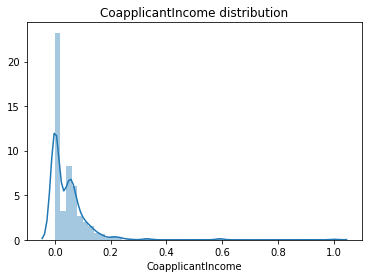

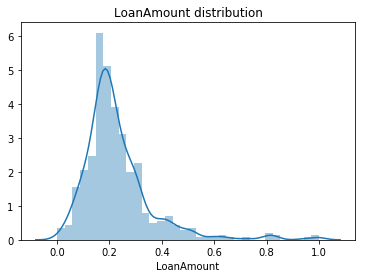

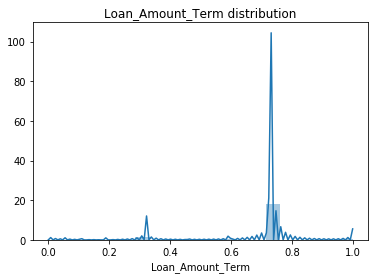

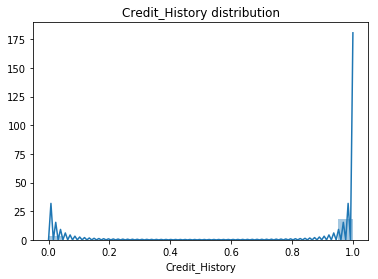

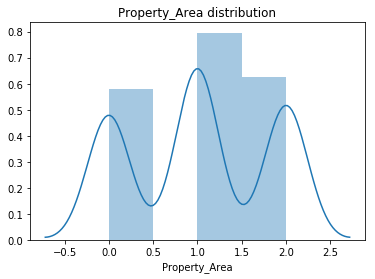

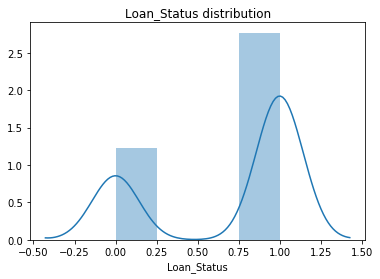

In [32]:
#Distribution plots for all columns 

col_names = list(df_ss)
col_names.remove('Loan_ID')
for col in col_names:
    inc_plot = sns.distplot(df_ss[col], axlabel=col).set_title(col+" distribution")
    plt.show()

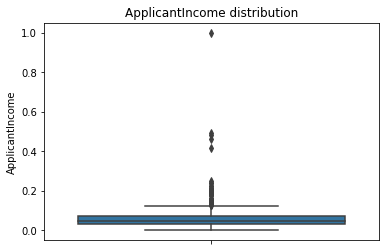

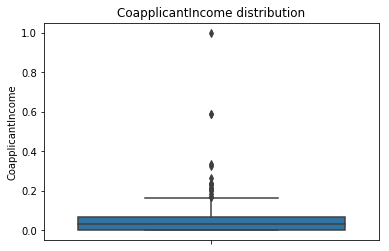

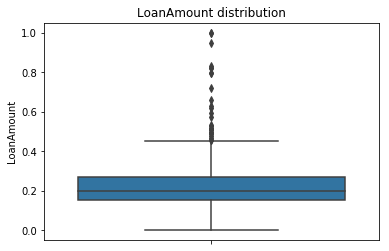

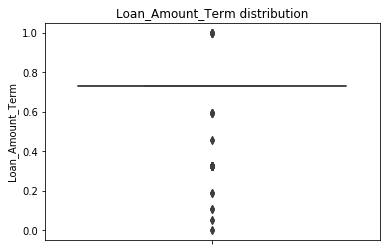

In [34]:
for col in num_cols:
    inc_plot = sns.boxplot(y=col, data=df_ss).set_title(col+" distribution")
    plt.show()

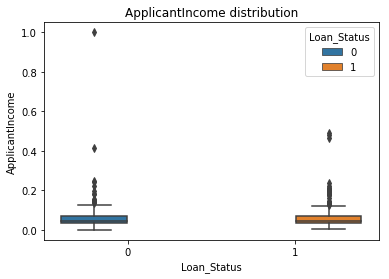

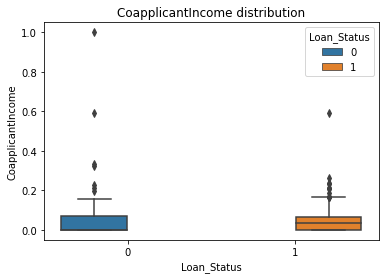

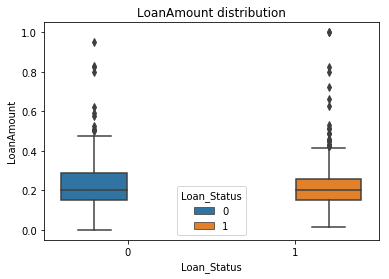

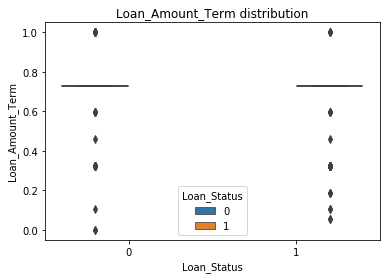

In [37]:
for col in num_cols:
    inc_plot = sns.boxplot(x="Loan_Status", y=col, data=df_ss, hue="Loan_Status").set_title(col+" distribution")
    plt.show()

In [40]:
print("feature mean median std\n")
for col in num_cols:
    print(col,df_ss[col].mean(), df_ss[col].median(), df_ss[col].std())

feature mean median std

ApplicantIncome 0.06449265615337044 0.04587507730364874 0.07010824057729967
CoapplicantIncome 0.04672676606406202 0.03205071371575494 0.07736183074511661
LoanAmount 0.22967075578116186 0.20135363790186125 0.13622362811101144
Loan_Amount_Term 0.6893018018018019 0.7297297297297298 0.1468747763072795


C:\Users\nagmani\Anaconda3\envs\idp\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nagmani\Anaconda3\envs\idp\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\nagmani\Anaconda3\envs\idp\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


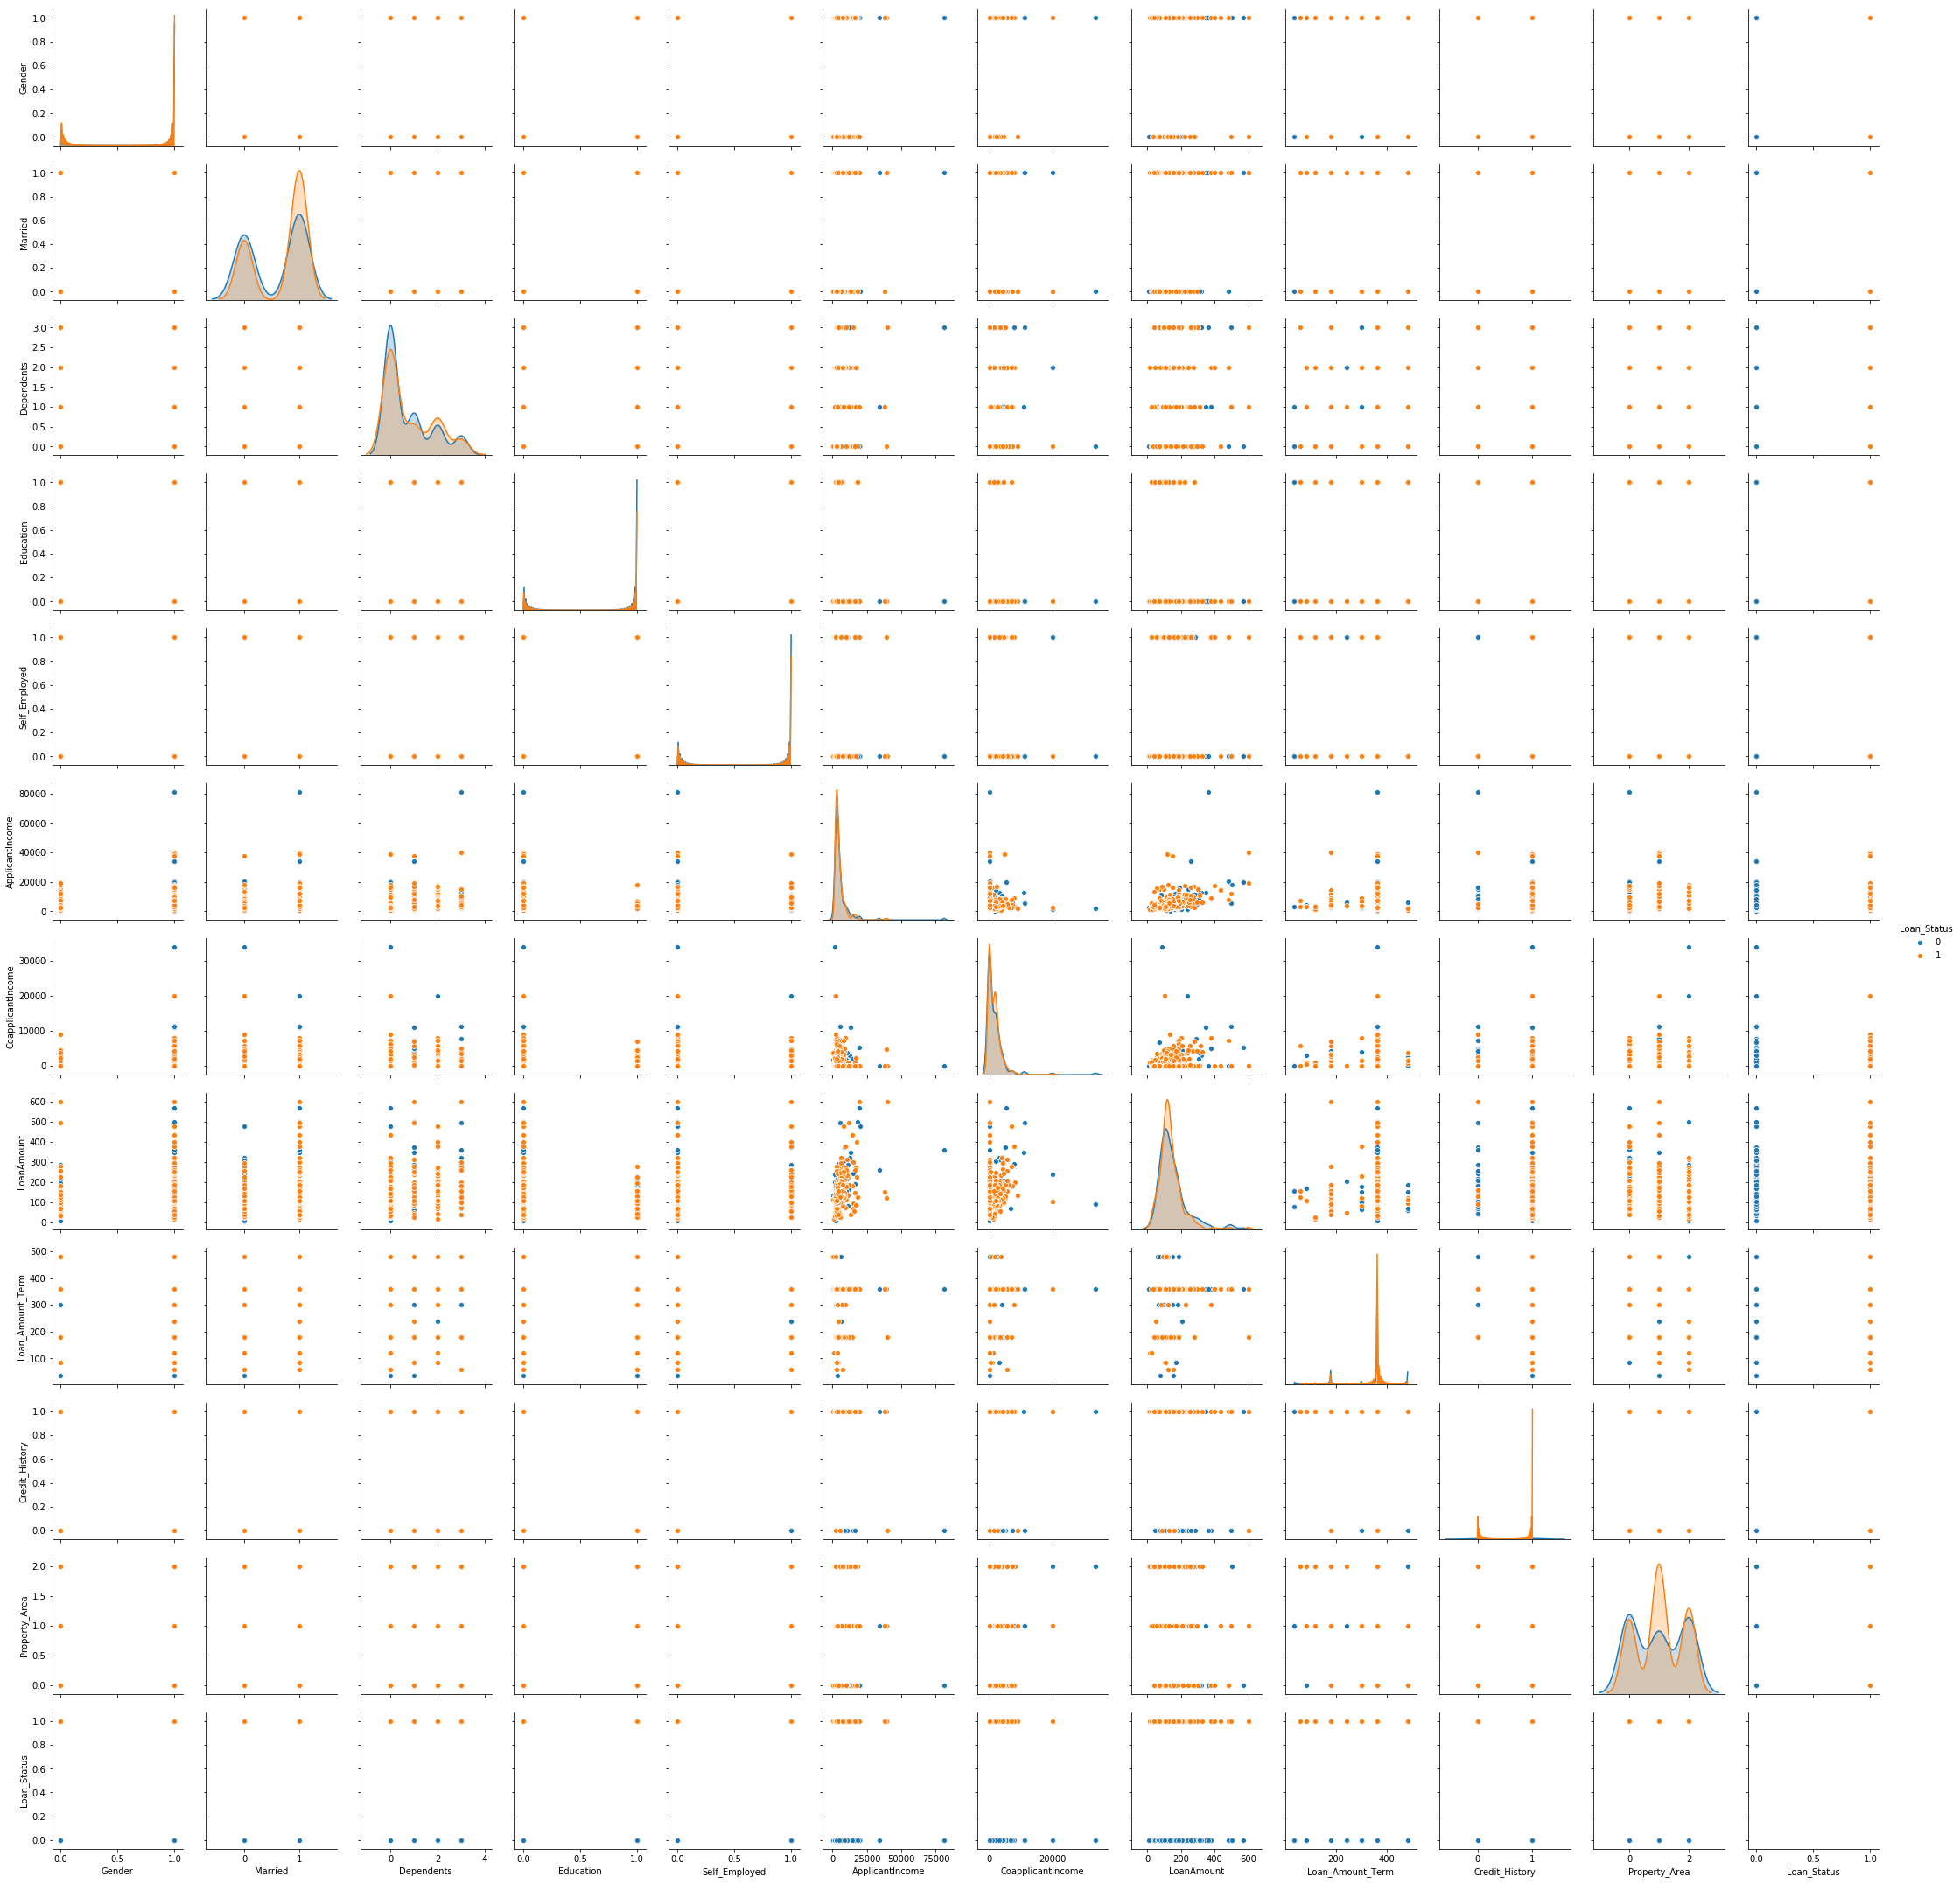

In [19]:
pair_plot = sns.pairplot(df_ss, hue = 'Loan_Status')
plt.show()

In [55]:
df.to_csv('../encoded_df.csv', index=False)

In [46]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [9]:
# df_ss = df.dropna()
# print(df_ss.shape)

# df['Dependents'] = df['Dependents'].astype('category', ordered=True, categories=['0', '1', '2', '3+'])
# df['Gender'] = df['Gender'].astype('category')
# df['Married'] = df['Married'].astype('category')
# df['Education'] = df['Education'].astype('category', ordered=True,  categories=['Graduate', 'Not Graduate'])
# df['Self_Employed'] = df['Self_Employed'].astype('category')
# df['Property_Area'] = df['Property_Area'].astype('category')
# df['Loan_Status'] = df['Loan_Status'].astype('category')
# print(df.dtypes)

# from sklearn.preprocessing import MinMaxScaler, RobustScaler


# num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
# trans_mm = MinMaxScaler(feature_range=(-1., 1.))  #quantile_range=(0.05, .95)
# df_ss[num_cols]= trans_mm.fit_transform(df_ss[num_cols])

# ordinal_cols = ['Dependents', 'Loan_Status']
# df_ss[ordinal_cols] = df_ss[ordinal_cols].apply(lambda x: x.cat.codes)

cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

df_temp = pd.get_dummies(df_ss[cat_cols], prefix=cat_cols)
df_ss.drop(cat_cols, axis=1, inplace=True)
df_ss = pd.concat([df_ss, df_temp], axis = 1)
df_ss.head()

C:\Users\nagmani\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,-0.890340,-0.910867,-0.597293,0.459459,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,-0.929499,-1.000000,-0.807107,0.459459,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,-0.939814,-0.860626,-0.624365,0.459459,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,-0.855288,-1.000000,-0.553299,0.459459,1.0,1,0,1,1,0,1,0,1,0,0,0,1
5,LP001011,2,-0.869709,-0.751987,-0.126904,0.459459,1.0,1,0,1,0,1,1,0,0,1,0,0,1


In [10]:
df_ss.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.777083,-0.871015,-0.906546,-0.540658,0.378604,0.854167,0.691667,0.179167,0.820833,0.352083,0.647917,0.797917,0.202083,0.862500,0.137500,0.289583,0.397917,0.312500
std,1.020815,0.140216,0.154724,0.272447,0.293750,0.353307,0.462287,0.383892,0.383892,0.478118,0.478118,0.401973,0.401973,0.344734,0.344734,0.454042,0.489979,0.463996
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.932004,-1.000000,-0.692047,0.459459,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-0.908250,-0.935899,-0.597293,0.459459,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,-0.858936,-0.866817,-0.455161,0.459459,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
corr = df_ss.corr()

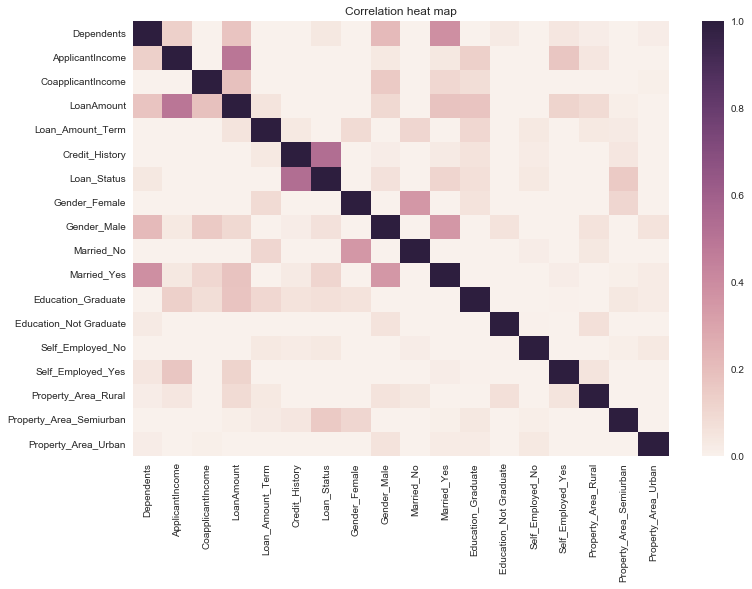

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
heat_map = sns.heatmap(corr, vmin=0, vmax=1).set_title("Correlation heat map")
plt.show()

In [13]:
df_ss.to_csv("data_for_modeling.csv", index=False)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc

In [42]:
def get_train_test_split(df, y_col, test_split):
    Y = df[y_col]
    x_col = list(df)
    x_col.remove(y_col)
    print(x_col)
    X = df[x_col]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_split, random_state = 2018)
    print("Train-Test split done.")
    print("Train size:", X_train.shape)
    print("Test size:", X_test.shape)
    return X_train, X_test, y_train, y_test

def build_LR():
    clf = LogisticRegression()
    return clf

def build_SVC(kernel='rbf'):  # kerbel = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
    clf = SVC(kernel=kernel, probability=True,)
    return clf

def build_RFC(depth=None):
    clf = RandomForestClassifier(max_depth=depth)
    return clf

def get_prediction(model, x):
    return model.predict(x)

def model_evaluation(model, X_train, y_train, X_test, y_test):
    y_pred_train = get_prediction(model, X_train)
    y_pred_test = get_prediction(model, X_test)
#     res_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
#     print(res_df)
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    rec_train = recall_score(y_true=y_train, y_pred=y_pred_train)
    prec_train = precision_score(y_true=y_train, y_pred=y_pred_train)
    
    print("Model evaluation of Training data: \n")
    print("Accuracy: ", acc_train)
    print("Recall: ", rec_train)
    print("Precision: ", prec_train)
    print()
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    rec_test = recall_score(y_true=y_test, y_pred=y_pred_test)
    prec_test = precision_score(y_true=y_test, y_pred=y_pred_test)
    
    print("Model evaluation of Test data: \n")
    print("Accuracy: ", acc_test)
    print("Recall: ", rec_test)
    print("Precision: ", prec_test)

In [43]:
# del df_ss['Loan_ID']
X_train, X_test, y_train, y_test = get_train_test_split(df_ss, 'Loan_Status', 0.2)

lr = build_LR()
svc = build_SVC('rbf')
rfc = build_RFC()

print("Training and Evaluation resuts of Logistic Regression")
lr.fit(X_train, y_train)
model_evaluation(lr, X_train, y_train, X_test, y_test)
print()

print("Training and Evaluation resuts of SVM classifier")
svc.fit(X_train, y_train)
model_evaluation(svc, X_train, y_train, X_test, y_test)
print()

print("Training and Evaluation resuts of Random Forest classifier")
rfc.fit(X_train, y_train)
model_evaluation(svc, X_train, y_train, X_test, y_test)

['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']
Train-Test split done.
Train size: (384, 17)
Test size: (96, 17)
Training and Evaluation resuts of Logistic Regression
Model evaluation of Training data: 

Accuracy:  0.8151041666666666
Recall:  0.9775280898876404
Precision:  0.8006134969325154

Model evaluation of Test data: 

Accuracy:  0.78125
Recall:  0.9846153846153847
Precision:  0.7619047619047619

Training and Evaluation resuts of SVM classifier
Model evaluation of Training data: 

Accuracy:  0.8151041666666666
Recall:  0.9775280898876404
Precision:  0.8006134969325154

Model evaluation of Test data: 

Accuracy:  0.78125
Recall:  0.9846153846153847
Precision:  0.7619047619047619

Training and Evaluation 